# Map plot of SRTM DEM based [on](http://geologyandpython.com/dem-processing.html) 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [10]:
bounds = gpd.read_file('../data/vector/Mumbai_extent.geojson').bounds

In [5]:
bounds

,minx,miny,maxx,maxy
0,72.776333,18.893956,72.979731,19.270177


In [11]:
west, south, east, north = bounds = bounds.loc[0]

In [12]:
west, south, east, north = bounds  = west - .05, south - .05, east + .05, north + .05

# Download the DEM

In [3]:
import elevation
import os
dem_path = '/home/jovyan/FOSS-Python-GeospatialAnalysis/data/raster/Mumbai_DEM.tif'
output = dem_path

In [17]:
elevation.clip(bounds=bounds, output=output, product='SRTM3')

# Read the DEM

In [4]:
import rasterio

dem_raster = rasterio.open(output)
source = dem_raster.read(1)
source
#dem_raster

array([[-32768, -32768, -32768, ...,     17,     15,     13],
       [-32768, -32768, -32768, ...,     14,     12,     12],
       [-32768, -32768, -32768, ...,     14,     13,      9],
       ..., 
       [-32768, -32768, -32768, ...,     63,     74,     90],
       [-32768, -32768, -32768, ...,     67,     69,     91],
       [-32768, -32768, -32768, ...,     62,     69,     93]], dtype=int16)

In [19]:
# Visualize the DEM

array([[-32768, -32768, -32768, ...,     17,     15,     13],
       [-32768, -32768, -32768, ...,     14,     12,     12],
       [-32768, -32768, -32768, ...,     14,     13,      9],
       ..., 
       [-32768, -32768, -32768, ...,     63,     74,     90],
       [-32768, -32768, -32768, ...,     67,     69,     91],
       [-32768, -32768, -32768, ...,     62,     69,     93]], dtype=int16)

In [5]:
#try:
import pycpt
topocmap = pycpt.load.cmap_from_cptcity_url('wkp/schwarzwald/wiki-schwarzwald-cont.cpt')
#except:
#    topocmap = 'Spectral_r'
#

In [6]:
from numpy import copy, random, arange

# unique, counts = np.unique(source, return_counts=True)
# dattif=dict(zip(unique, counts))
# dattif

def f1(a, d):
    b = copy(a)
    for k, v in d.items():
        b[a==k] = v
    return b

d = {-32768:0,-16:0,-15:0,-13:0,-12:0,-11:0,-10:0,-9:0,-8:0,-7:0,-6:0,-5:0,-4:0,-3:0,-2:0,-1:0}
data_dem=f1(source,d)

In [26]:
unique, counts = np.unique(data_dem, return_counts=True)
dattif=dict(zip(unique, counts))
#dattif

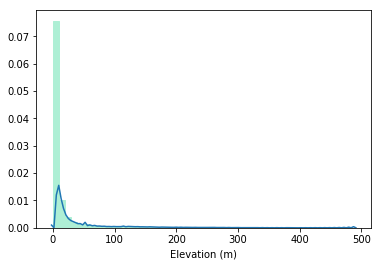

In [8]:
import matplotlib.pyplot as plt

vmin = 180
vmax = 575

ax = sns.distplot(data_dem.ravel(), axlabel='Elevation (m)')
ax = plt.gca()
_ = [patch.set_color(topocmap(plt.Normalize(vmin=vmin, vmax=vmax)(patch.xy[0]))) for patch in ax.patches]
_ = [patch.set_alpha(1) for patch in ax.patches]
ax.get_figure().savefig('1.png')


In [14]:
extent = xmin, xmax, ymin, ymax = west,east, south, north 

In [15]:
extent

(72.72633295153348, 73.02973149704592, 18.84395643371942, 19.320176667777737)

In [16]:
def hillshade(array, azimuth, angle_altitude):

    # Source: http://geoexamples.blogspot.com.br/2014/03/shaded-relief-images-using-gdal-python.html

    x, y = np.gradient(array)
    slope = np.pi/2. - np.arctan(np.sqrt(x*x + y*y))
    aspect = np.arctan2(-x, y)
    azimuthrad = azimuth*np.pi / 180.
    altituderad = angle_altitude*np.pi / 180.


    shaded = np.sin(altituderad) * np.sin(slope) \
     + np.cos(altituderad) * np.cos(slope) \
     * np.cos(azimuthrad - aspect)
    return 255*(shaded + 1)/2


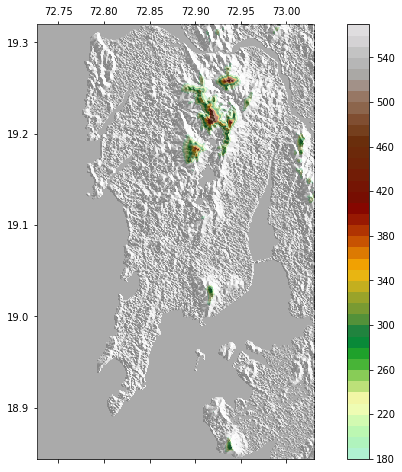

In [19]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.matshow(hillshade(data_dem, 30, 30), extent=extent, cmap='Greys', alpha=.5, zorder=10)
cax = ax.contourf(data_dem, np.arange(vmin, vmax, 10),extent=extent, 
                  cmap=topocmap, vmin=vmin, vmax=vmax, origin='image')
fig.colorbar(cax, ax=ax)
fig.savefig('2.png')